## Evaluating the neural network on making predictions with different features like increasing the number of neurons, adding a new layer (adding new parameters), and changing the activation function from sigmoid to step function.



In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import gzip

## Added a new layer

In [35]:
class Network(object):
    def __init__(self, n, m):
        # Initialize the weights randomly
        # Adding new layer 
        self.W = np.random.randn(n, 784)    
        self.b = np.random.randn(n)
        self.V = np.random.randn(10, n)
        self.bprime = np.random.randn(10)
        self.vprime=np.random.randn(10,m)
        self.c=np.random.randn(10)
        
    def feedforward(self, x):
        # Return the output of a feedforward pass
        a = sigmoid(np.dot(self.W, x)+self.b)
        a_second=sigmoid(np.dot(self.V, a)+self.bprime)
        return sigmoid(np.dot(self.vprime, a_second)+self.c)
    
    def evaluate(self, data):
        """ Return (cost, accuracy) on the data"""
        correct_samples = 0
        total_cost = 0
        n_samples = len(data)
        
        for x, ylabel in data:
            y = self.feedforward(x)
            prediction = np.argmax(y)
            if prediction == ylabel:
                correct_samples += 1
            
            y[ylabel] -= 1.0
            total_cost += 0.5*np.dot(y, y)
        
        return total_cost / n_samples, correct_samples / n_samples
            
    
    def update_mini_batch(self, mini_batch, eta):
        # Run backprop and update weights on the minibatch
        k = len(mini_batch)
        delta_W = np.zeros(self.W.shape)
        delta_b = np.zeros(self.b.shape)
        delta_V = np.zeros(self.V.shape)
        delta_bprime = np.zeros(self.bprime.shape)
        delta_vprime=np.zeros(self.vprime.shape)
        delta_c=np.zeros(self.c.shape)
        
        for x, y in mini_batch:
            nabla_W, nabla_b, nabla_V, \
                nabla_bprime,nabla_vprime, nabla_c = self.backprop(x, y)
            delta_W += nabla_W
            delta_b += nabla_b
            delta_V += nabla_V
            delta_bprime += nabla_bprime
            delta_vprime+=nabla_vprime
            delta_c+=nabla_c
        
        self.W -= eta/k * delta_W
        self.b -= eta/k * delta_b
        self.V -= eta/k * delta_V
        self.bprime -= eta/k * delta_bprime
        self.vprime-=eta/k*delta_vprime
        self.c-=eta/k*delta_c

    def SGD(self, training_data, epochs, mini_batch_size, 
            eta, test_data=[]):
        # Run SGD with those parameters
        # Return a list of results for every epoch
        # For each epoch, append pair (self.evaluate(training_data), 
        #        self.evaluate(test_data))
        res = []

        for i in range(epochs):
            np.random.shuffle(training_data)
            for j in range(0, len(training_data), mini_batch_size):
                mini_batch = training_data[j:j+mini_batch_size]
                self.update_mini_batch(mini_batch, eta)
                
            res.append((self.evaluate(training_data),
                       self.evaluate(test_data)))
            
            print('Epoch '+str(i)+' finished')
        
        return res
        
    
### THE PART BELOW WILL BE EXPLAINED LATER
        
    def backprop(self, x, y):
        # feedforward
        z1 = np.dot(self.W, x)+self.b
        a1 = sigmoid(z1)
        z2 = np.dot(self.V, a1)+self.bprime
        a2 = sigmoid(z2)
        z3=np.dot(self.vprime, a2)+self.c
        a3=sigmoid(z3)
        
        # backward
        delta_3 = self.cost_derivative(a3, y) * sigmoid_prime(z3)
        nabla_c = delta_3
        nabla_vprime = np.outer(delta_3, a2)
        
        delta_2 = np.dot(self.vprime.transpose(), delta_3) * sigmoid_prime(z2)
        nabla_bprime = delta_2
        nabla_V = np.outer(delta_2, a1)
        
        delta_1 = np.dot(self.V.transpose(), delta_2) * sigmoid_prime(z1)
        nabla_b = delta_1
        nabla_W = np.outer(delta_1, x)
        
        return nabla_W, nabla_b, nabla_V, nabla_bprime, nabla_vprime, nabla_c
            
    def cost_derivative(self, output_activations, ylabel):
        r"""Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-Network.vec_output[ylabel])
    
    vec_output = []
    for ylabel in range(10):
        vprime = np.zeros(10)
        vprime[ylabel] = 1
        vec_output.append(vprime)  

In [36]:
def sigmoid(z):   #ACTIVATION FUNCTION
    return 1 / (1.0+np.exp(-z))
def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))

In [37]:
def load_data():
    # Note you have to update the path below
    f = gzip.open('mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
    f.close()
    return training_data, validation_data, test_data

In [38]:
TRAIN, VALIDATION, TEST = load_data()

In [39]:
len(TRAIN), len(TRAIN[0]), len(TRAIN[1])

(2, 50000, 50000)

In [40]:
TRAIN[0][0].shape, TRAIN[1][0]

((784,), 5)

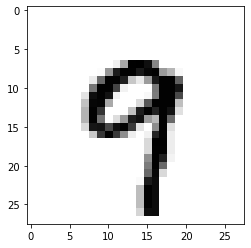

In [41]:
IM = np.reshape(TRAIN[0][170], (28, 28))
plt.imshow(1-IM, cmap='gray')

In [42]:
TRAIN[1][170]

9

In [43]:
def zip_data(D):
    return list(zip(D[0], D[1]))

In [44]:
train_data = zip_data(TRAIN)
validation_data = zip_data(VALIDATION)
test_data = zip_data(TEST)

In [45]:
NET = Network(30, 10) # NUMBER OF NEURONS

In [46]:
NET.c

array([-0.10829676,  1.36135788,  0.51113986,  1.24618717,  0.66283631,
        0.72543791,  0.26320741, -1.47097587, -0.39778091,  1.90645044])

In [47]:
print(NET.feedforward(train_data[3][0]))

[0.93775003 0.02234836 0.6725337  0.88566767 0.9936324  0.40257552
 0.18913301 0.03132541 0.70954167 0.10109789]


In [48]:
NET.evaluate(train_data) # We should expect the accuracy to be around 10%

(1.8999743742924269, 0.09894)

### Too small learning rate

In [49]:
results = NET.SGD(train_data, 30, 10, 0.001, test_data)  #CHANGE 10 TO DIFFERENT VALUE, ITS THE MINI BATCH

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished
Epoch 5 finished
Epoch 6 finished
Epoch 7 finished
Epoch 8 finished
Epoch 9 finished
Epoch 10 finished
Epoch 11 finished
Epoch 12 finished
Epoch 13 finished
Epoch 14 finished
Epoch 15 finished
Epoch 16 finished
Epoch 17 finished
Epoch 18 finished
Epoch 19 finished
Epoch 20 finished
Epoch 21 finished
Epoch 22 finished
Epoch 23 finished
Epoch 24 finished
Epoch 25 finished
Epoch 26 finished
Epoch 27 finished
Epoch 28 finished
Epoch 29 finished


In [50]:
results

[((1.059303536267857, 0.0972), (1.0510108725135747, 0.0982)),
 ((0.8315938647451111, 0.09694), (0.8237238949887906, 0.0979)),
 ((0.553862522207258, 0.10906), (0.5475402113701506, 0.1153)),
 ((0.48448110273078326, 0.12192), (0.481047350796992, 0.1273)),
 ((0.4703665020846871, 0.12488), (0.46765072043774497, 0.1337)),
 ((0.46461265854680395, 0.12752), (0.4622401197905593, 0.135)),
 ((0.4614370690966139, 0.13066), (0.4592752277593912, 0.138)),
 ((0.4593413081518709, 0.13526), (0.4573237634564446, 0.1415)),
 ((0.45777616656474573, 0.14266), (0.455863211563578, 0.1494)),
 ((0.45650326762895266, 0.15494), (0.45466851987425627, 0.1638)),
 ((0.45540824077147934, 0.16622), (0.45363253264018394, 0.1756)),
 ((0.4544288140595132, 0.1746), (0.45269767962315266, 0.1846)),
 ((0.4535290528977669, 0.18218), (0.4518310929496193, 0.1877)),
 ((0.4526849053009681, 0.18646), (0.45101102452240577, 0.1931)),
 ((0.4518825970288312, 0.1898), (0.4502245191719229, 0.1965)),
 ((0.45110737206569945, 0.19262), (0.44

In [51]:
def plot_results(res):
    X = list(range(len(res)))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    train_acc = [x[0][1] for x in res]
    test_acc = [x[1][1] for x in res]
    ax1.plot(X, train_acc, label='train')
    ax1.plot(X, test_acc, label='test')
    ax1.set_title('Accuracy')
    ax1.legend()
    
    train_cost = [x[0][0] for x in res]
    test_cost = [x[1][0] for x in res]
    ax2.plot(X, train_cost, label='train')
    ax2.plot(X, test_cost, label='test')
    ax2.set_title('Loss')
    ax2.legend()

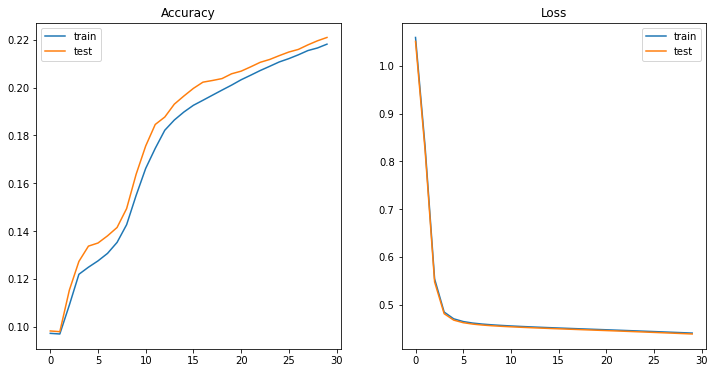

In [52]:
plot_results(results)

### Learning rate too large

In [53]:
NET2 = Network(30,10)
results2 = NET2.SGD(train_data, 30, 10, 100.0, test_data)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished
Epoch 5 finished
Epoch 6 finished
Epoch 7 finished
Epoch 8 finished
Epoch 9 finished
Epoch 10 finished
Epoch 11 finished
Epoch 12 finished
Epoch 13 finished
Epoch 14 finished
Epoch 15 finished
Epoch 16 finished
Epoch 17 finished
Epoch 18 finished
Epoch 19 finished
Epoch 20 finished
Epoch 21 finished
Epoch 22 finished
Epoch 23 finished
Epoch 24 finished
Epoch 25 finished
Epoch 26 finished
Epoch 27 finished
Epoch 28 finished
Epoch 29 finished


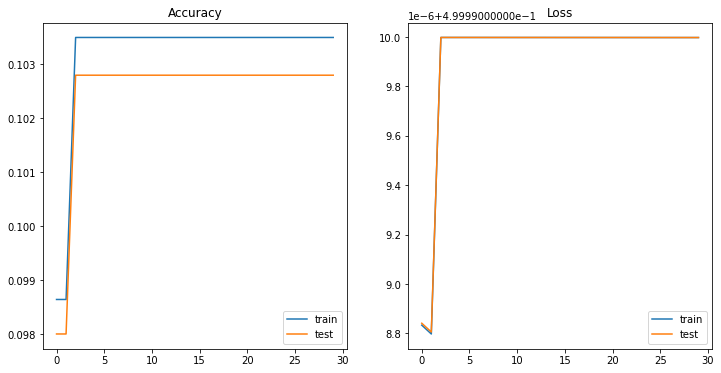

In [54]:
plot_results(results2)

### Better learning rate found by experimentation

In [55]:
NET3 = Network(30,10)
results3 = NET3.SGD(train_data, 30, 10, 3.0, test_data)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished
Epoch 5 finished
Epoch 6 finished
Epoch 7 finished
Epoch 8 finished
Epoch 9 finished
Epoch 10 finished
Epoch 11 finished
Epoch 12 finished
Epoch 13 finished
Epoch 14 finished
Epoch 15 finished
Epoch 16 finished
Epoch 17 finished
Epoch 18 finished
Epoch 19 finished
Epoch 20 finished
Epoch 21 finished
Epoch 22 finished
Epoch 23 finished
Epoch 24 finished
Epoch 25 finished
Epoch 26 finished
Epoch 27 finished
Epoch 28 finished
Epoch 29 finished


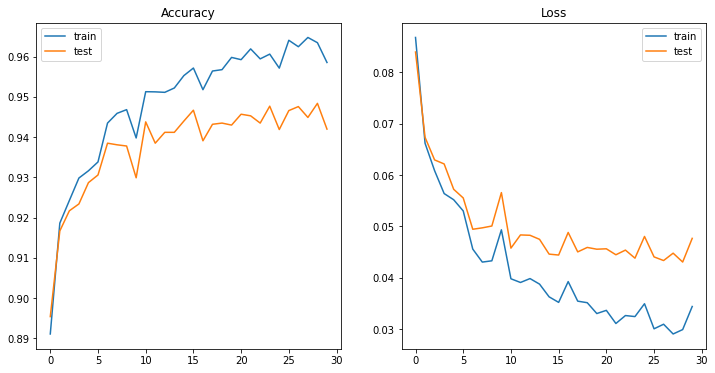

In [56]:
plot_results(results3)

In [57]:
results3

[((0.08682050483424296, 0.89108), (0.08398539073336632, 0.8954)),
 ((0.06619275018824416, 0.91864), (0.06734960639034582, 0.9167)),
 ((0.06085248120004515, 0.92426), (0.06294884974591897, 0.9217)),
 ((0.05639303119046337, 0.92984), (0.06216499007747616, 0.9234)),
 ((0.05518477028116044, 0.93164), (0.05722249588024888, 0.9287)),
 ((0.05300573115688288, 0.93384), (0.05553352476026629, 0.9306)),
 ((0.04556758641277041, 0.9435), (0.049433438939662476, 0.9385)),
 ((0.04303202011888671, 0.94592), (0.04970865920771766, 0.9381)),
 ((0.043283211494253036, 0.94684), (0.05006653334923403, 0.9378)),
 ((0.049324656170784666, 0.9398), (0.05657781796943838, 0.9299)),
 ((0.03977949704772988, 0.9513), (0.045752777634674786, 0.9438)),
 ((0.03905903875045726, 0.95126), (0.04832685273832645, 0.9385)),
 ((0.039818253653761605, 0.95114), (0.04825735175367397, 0.9412)),
 ((0.038737583472101676, 0.95222), (0.047466776738216525, 0.9412)),
 ((0.03626184441112574, 0.9553), (0.04458634553331133, 0.944)),
 ((0.035

In [58]:
np.max([x[1][1] for x in results3])

0.9484

The best accuracy on test data we got is **94.84%**. Your result can be somewhat different depending on the randomness.

### Interpreting the neurons

In [29]:
neuron_index = 7
zero_activations = []
one_activations = []
for x, ylabel in test_data:
    if ylabel == 0:
        a = sigmoid(np.dot(NET2.W[neuron_index], x)+NET2.b[neuron_index])
        zero_activations.append(a)
    if ylabel == 1:
        a = sigmoid(np.dot(NET2.W[neuron_index], x)+NET2.b[neuron_index])
        one_activations.append(a)        

In [30]:
len(zero_activations), len(one_activations)

(980, 1135)

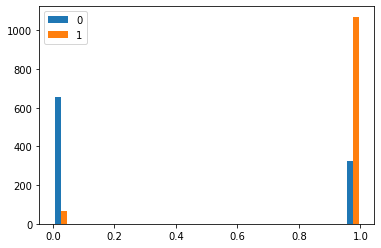

In [31]:
plt.hist([zero_activations, one_activations], bins=20, 
          range=(0, 1), label=['0', '1'])
plt.legend()

In [32]:
neuron_weights = np.reshape(NET2.W[neuron_index], (28, 28))

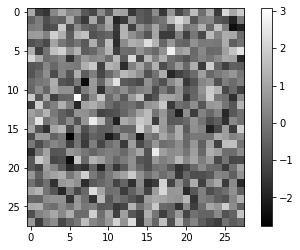

In [33]:
plt.imshow(neuron_weights, cmap='gray')
plt.colorbar()

You can try and interpret the neuron outputs. Exact results will depend on your network.

### Increasing the number of neurons

In [39]:
NET4 = Network(100)
results4 = NET4.SGD(train_data, 30, 10, 3.0, test_data)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished
Epoch 5 finished
Epoch 6 finished
Epoch 7 finished
Epoch 8 finished
Epoch 9 finished
Epoch 10 finished
Epoch 11 finished
Epoch 12 finished
Epoch 13 finished
Epoch 14 finished
Epoch 15 finished
Epoch 16 finished
Epoch 17 finished
Epoch 18 finished
Epoch 19 finished
Epoch 20 finished
Epoch 21 finished
Epoch 22 finished
Epoch 23 finished
Epoch 24 finished
Epoch 25 finished
Epoch 26 finished
Epoch 27 finished
Epoch 28 finished
Epoch 29 finished


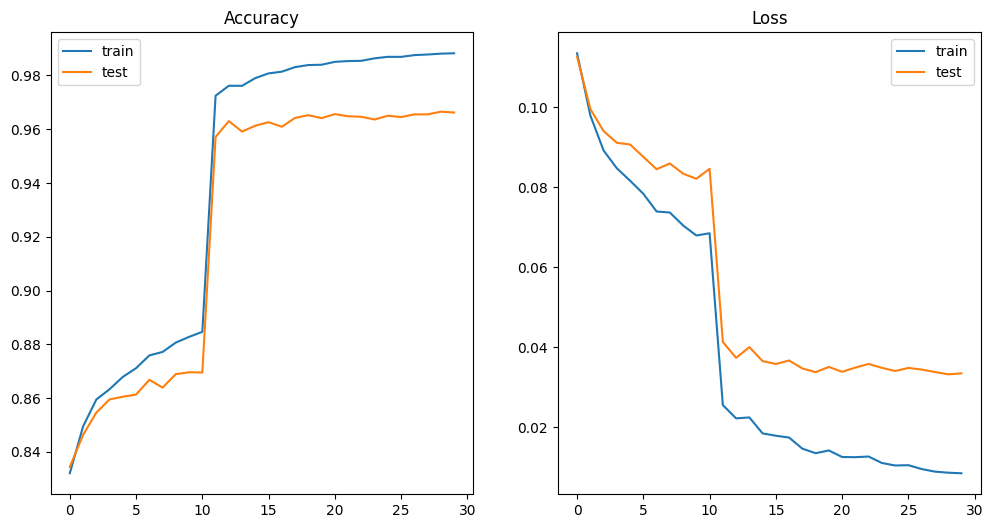

In [88]:
plot_results(results4)

In [89]:
np.max([x[1][1] for x in results4])

0.9665

# Comments from the changes

From the changes i made, i changed the activation function and used tanh at first, but it did not give good test accuracy, then changed to step function and also added a new layer, but this worsened the condition, then returned back to sigmoid function and added a new layer, I got caught up with time, so i did not train the net work with different values of neurons.

But i tried with a total of 40 neurons in the hidden layers and and the accuracy was 94.88%, the network needs to be modified more to improve its accuracy.